![人工智慧 - 自由團隊](https://raw.githubusercontent.com/chenkenanalytic/img/master/af/aifreeteam.png)
# 【章節三】單元十四 分類模型實作隨機森林
# 注意事項
* [[Kaggle Link](https://www.kaggle.com/lodetomasi1995/income-classification)] 需先下載 income_evaluation.csv 並上傳到此虛擬機(VM, Virtual Machine)上

## 步驟一: 讀取收入分類資料集

In [ ]:
import pandas as pd # 常用來讀 csv 的套件

Dataset = pd.read_csv("./income_evaluation.csv")
Dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 步驟二:資料視覺化與特徵工程
* 處理缺失值
* 處理欄位空格字元
* 視覺化與特徵工程
* 將欄位(income)轉換成 1 與 0 的形式

In [ ]:
# 檢查欄位是否有 NaN
for index, col in enumerate(Dataset.columns):
  print(f"第{index+1}個欄位 {col} 的缺失值共有 {Dataset[col].isnull().sum()} 筆")

第1個欄位 age 的缺失值共有 0 筆
第2個欄位  workclass 的缺失值共有 0 筆
第3個欄位  fnlwgt 的缺失值共有 0 筆
第4個欄位  education 的缺失值共有 0 筆
第5個欄位  education-num 的缺失值共有 0 筆
第6個欄位  marital-status 的缺失值共有 0 筆
第7個欄位  occupation 的缺失值共有 0 筆
第8個欄位  relationship 的缺失值共有 0 筆
第9個欄位  race 的缺失值共有 0 筆
第10個欄位  sex 的缺失值共有 0 筆
第11個欄位  capital-gain 的缺失值共有 0 筆
第12個欄位  capital-loss 的缺失值共有 0 筆
第13個欄位  hours-per-week 的缺失值共有 0 筆
第14個欄位  native-country 的缺失值共有 0 筆
第15個欄位  income 的缺失值共有 0 筆


In [ ]:
# 發現欄位有空格，所以把空格給去除
print("[處理前]")
print(Dataset.columns)

Dataset.columns = list(map(lambda a: a.lstrip(), Dataset.columns)) # 這一行程式碼可以把空格去除

print("[處理後]")
print(Dataset.columns)

[處理前]
Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')
[處理後]
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


### 第一個欄位(age)

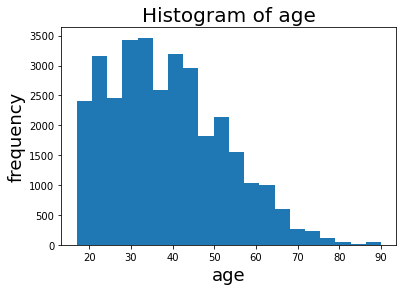

In [ ]:
import matplotlib.pyplot as plt
plt.hist(Dataset["age"], bins=20)
plt.title("Histogram of age", fontsize=20)
plt.xlabel("age", fontsize=18)
plt.ylabel("frequency", fontsize=18)
plt.show()

### 第二個欄位(workclass)

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


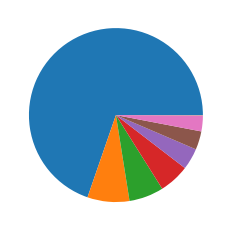

In [ ]:
import matplotlib.pyplot as plt

print(Dataset["workclass"].value_counts())
plt.pie(Dataset["workclass"].value_counts())
plt.show()

### 第三個欄位(fnlwgt)

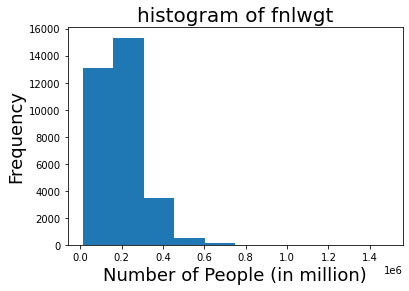

In [ ]:
import matplotlib.pyplot as plt

plt.hist(Dataset["fnlwgt"])
plt.title("histogram of fnlwgt", fontsize=20)
plt.xlabel("Number of People (in million)", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.show()

### 第四個欄位(education)

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64


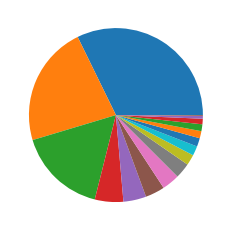

In [ ]:
import matplotlib.pyplot as plt

print(Dataset["education"].value_counts())
plt.pie(Dataset["education"].value_counts())
plt.show()

### 第五個欄位(education-num)

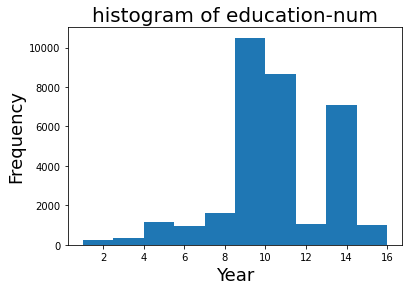

In [ ]:
import matplotlib.pyplot as plt

plt.hist(Dataset["education-num"])
plt.title("histogram of education-num", fontsize=20)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.show()

### 第六個欄位(marital-status)

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64


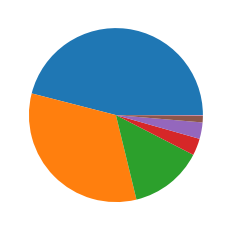

In [ ]:
import matplotlib.pyplot as plt

print(Dataset["marital-status"].value_counts())
plt.pie(Dataset["marital-status"].value_counts())
plt.show()

### 第七個欄位(occupation)

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64


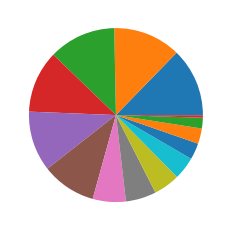

In [ ]:
import matplotlib.pyplot as plt

print(Dataset["occupation"].value_counts())
plt.pie(Dataset["occupation"].value_counts())
plt.show()

### 第八個欄位(relationship)

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64


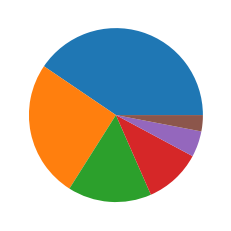

In [ ]:
import matplotlib.pyplot as plt

print(Dataset["relationship"].value_counts())
plt.pie(Dataset["relationship"].value_counts())
plt.show()

### 第九個欄位(race)

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64


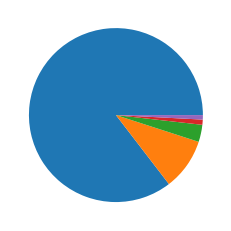

In [ ]:
import matplotlib.pyplot as plt

print(Dataset["race"].value_counts())
plt.pie(Dataset["race"].value_counts())
plt.show()

### 第十個欄位(sex)

 Male      21790
 Female    10771
Name: sex, dtype: int64


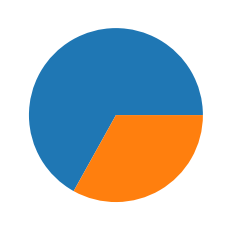

In [ ]:
import matplotlib.pyplot as plt

print(Dataset["sex"].value_counts())
plt.pie(Dataset["sex"].value_counts())
plt.show()

### 第十一個欄位(capital-gain)

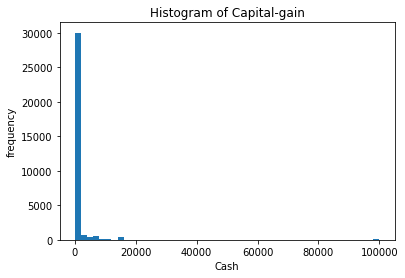

In [ ]:
#(11/15) capital-gain
import matplotlib.pyplot as plt

plt.hist(Dataset["capital-gain"], bins=50)
plt.title("Histogram of Capital-gain")
plt.xlabel("Cash")
plt.ylabel("frequency")
plt.show()

### 第十二個欄位(capital-loss)

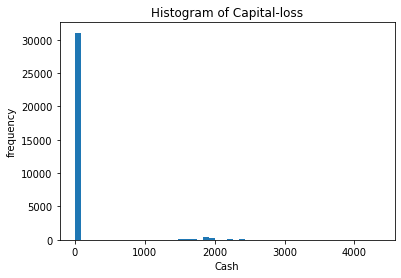

In [ ]:
import matplotlib.pyplot as plt

plt.hist(Dataset["capital-loss"], bins=50)
plt.title("Histogram of Capital-loss")
plt.xlabel("Cash")
plt.ylabel("frequency")
plt.show()

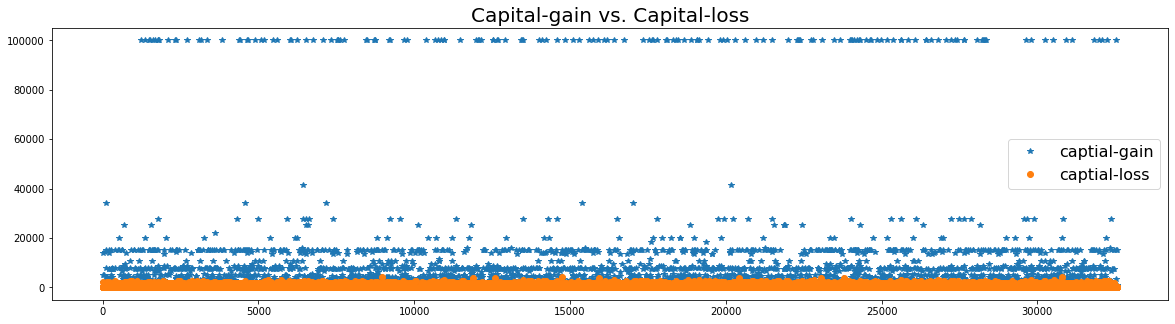

In [ ]:
# 觀察 capital-gain 與 capital-loss 
plt.figure(figsize=(20,5))
plt.plot(Dataset["capital-gain"], "*", label="captial-gain")
plt.plot(Dataset["capital-loss"], "o", label="captial-loss")
plt.title("Capital-gain vs. Capital-loss", fontsize=20)
plt.legend(fontsize=16)
plt.show()

### (Optional) 特徵加值: 嘗試由原始欄位生成新的欄位

In [ ]:
# 把新的欄位命名為: capital-earn

# 方法一
Dataset["capital-earn"] = Dataset["capital-gain"] - Dataset["capital-loss"]

# 方法二
Dataset["capital-earn"] = Dataset.apply(lambda row: row["capital-gain"] - row["capital-loss"], axis=1)

### 第十三個欄位(hours-per-week)

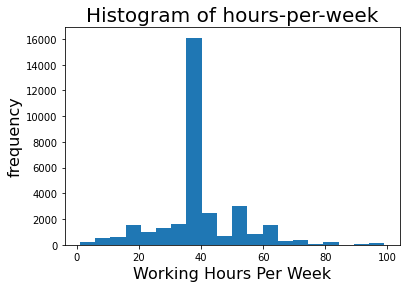

In [ ]:
import matplotlib.pyplot as plt

plt.hist(Dataset["hours-per-week"], bins=20)
plt.title("Histogram of hours-per-week", fontsize=20)
plt.xlabel("Working Hours Per Week", fontsize=16)
plt.ylabel("frequency", fontsize=16)
plt.show()

### 第十四個欄位(native-country)

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

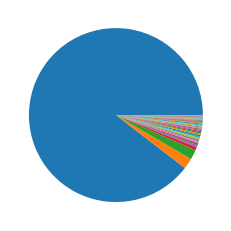

In [ ]:
import matplotlib.pyplot as plt

print(Dataset["native-country"].value_counts())
plt.pie(Dataset["native-country"].value_counts())
plt.show()

### 第十五個欄位(income)

 <=50K    24720
 >50K      7841
Name: income, dtype: int64


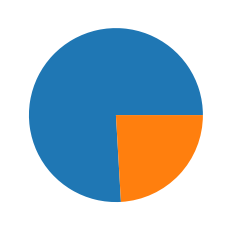

In [ ]:
import matplotlib.pyplot as plt

print(Dataset["income"].value_counts())
plt.pie(Dataset["income"].value_counts())
plt.show()

In [ ]:
# 把 字串型態的Answer (i.e. <=50K, >50K) 換成 1 與 0
print("[Before] ", Dataset["income"].value_counts())
Dataset["income"] = Dataset.apply(lambda row: 0 if row["income"]==" <=50K" else 1,axis=1)
print("\n[After] ", Dataset["income"].value_counts())

[Before]   <=50K    24720
 >50K      7841
Name: income, dtype: int64

[After]  0    24720
1     7841
Name: income, dtype: int64


## 步驟三: 辨識 數值型與類別型特徵

In [ ]:
numerical_attributes = []
categorical_attributes = []

for col in Dataset.columns:
  # print(Dataset[col].dtypes)
  attr_type = Dataset[col].dtypes
  if attr_type == "int64":
    numerical_attributes.append(col)
  elif attr_type == "object":
    categorical_attributes.append(col)

# 我們知道 income 是我們要分類的目標，它屬於 類別型 特徵
# 所以才有 remove 和 append 的操作
numerical_attributes.remove("income")
categorical_attributes.append("income")

print(f"數值型資料:{numerical_attributes}")
print(f"類別型資料:{categorical_attributes}")

數值型資料:['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'capital-earn']
類別型資料:['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


## 步驟四: 進行 One-Hot Encoding

In [ ]:
# 使用 pandas 的 get_dummies，可以迅速的對 Dataset 中屬於類別型的欄位進行 One-Hot Encoding

print(f"One-Hot Encoding 前有 {Dataset.shape[1]} 個欄位")
One_Hot_Dataset = pd.get_dummies(Dataset)
print(f"One-Hot Encoding 後有 {One_Hot_Dataset.shape[1]} 個欄位")

One-Hot Encoding 前有 16 個欄位
One-Hot Encoding 後有 110 個欄位


## 步驟五: 進行資料切分

In [ ]:
Y = One_Hot_Dataset["income"]
X = One_Hot_Dataset.drop(["income"], axis=1)

In [ ]:
# 使用 Scikitlearn 套件的 train_test_split 協助我們切分訓練資料集和驗證資料集
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print("訓練資料集有", len(X_train), "筆資料")
print("驗證資料集有", len(X_test), "筆資料")

# 訓練資料，是用來讓 Decision Tree / Random Forest 決定每個 node 應該要放什麼 attributes 的
# 驗證資料，不會參與訓練，將拿來評估最後模型表現的

訓練資料集有 22792 筆資料
驗證資料集有 9769 筆資料


## 步驟六: 進行 Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# 取出 Training Dataset 和 Testing Dataset 的數值型資料
X_train_numerical = X_train[numerical_attributes]
X_test_numerical = X_test[numerical_attributes]

# 僅使用 training dataset 的資料去找到 mapping 的 rule ，大家知道為什麼嗎?
X_scaler = StandardScaler().fit(X_train_numerical)

# 使用 scaler 對 training 與 testing dataset 的數值型資料進行 transform
X_train_numerical_trans = X_scaler.transform(X_train_numerical)
X_test_numerical_trans = X_scaler.transform(X_test_numerical)

# 對數值型欄位的資料進行覆寫
X_train[numerical_attributes] = X_train_numerical_trans
X_test[numerical_attributes] = X_test_numerical_trans

## 步驟七: 生成決策樹 & 生成隨機森林

In [ ]:
# 使用決策樹 Decision Tree
from sklearn.tree import DecisionTreeClassifier
from time import time

DT_Algorithm = DecisionTreeClassifier()


tic = time()
DT_Model = DT_Algorithm.fit(X_train, Y_train)
toc = time()
print(f"決策樹訓練花費時間為{round(toc-tic)}(sec)")

# 使用隨機森林 Random Forest，用1, 10, 30 棵 Decision Tree
from sklearn.ensemble import RandomForestClassifier
RF_01_Algorithm = RandomForestClassifier(n_estimators=1)
RF_10_Algorithm = RandomForestClassifier(n_estimators=10)
RF_30_Algorithm = RandomForestClassifier(n_estimators=30)
RF_100_Algorithm = RandomForestClassifier(n_estimators=100)

tic = time()
RF_01_Model = RF_01_Algorithm.fit(X_train, Y_train)
toc = time()
print(f"決策樹訓練花費時間為{round(toc-tic)}(sec)")

tic = time()
RF_10_Model = RF_10_Algorithm.fit(X_train, Y_train)
toc = time()
print(f"決策樹訓練花費時間為{round(toc-tic)}(sec)")

tic = time()
RF_30_Model = RF_30_Algorithm.fit(X_train, Y_train)
toc = time()
print(f"決策樹訓練花費時間為{round(toc-tic)}(sec)")

tic = time()
RF_100_Model = RF_100_Algorithm.fit(X_train, Y_train)
toc = time()
print(f"決策樹訓練花費時間為{round(toc-tic)}(sec)")

決策樹訓練花費時間為0(sec)
決策樹訓練花費時間為0(sec)
決策樹訓練花費時間為0(sec)
決策樹訓練花費時間為1(sec)
決策樹訓練花費時間為3(sec)


## 步驟八: 評估模型表現

In [ ]:
from sklearn.metrics import accuracy_score

# 評估單棵決策樹的表現
DT_Prediction = DT_Model.predict(X_test)
DT_Accuracy = accuracy_score(Y_test, DT_Prediction)
print("決策樹之準確率為", round(DT_Accuracy*100,2), "%")

# 評估隨機森林（內有 1 棵決策樹）的表現
RF_01_Prediction = RF_01_Model.predict(X_test)
RF_01_Accuracy = accuracy_score(Y_test, RF_01_Prediction)
print("隨機森林（1棵決策樹）之準確率為", round(RF_01_Accuracy * 100, 2), "%")

# 評估隨機森林（內有 10 棵決策樹）的表現
RF_10_Prediction = RF_10_Model.predict(X_test)
RF_10_Accuracy = accuracy_score(Y_test, RF_10_Prediction)
print("隨機森林（10棵決策樹）之準確率為", round(RF_10_Accuracy * 100, 2), "%")

# 評估隨機森林（內有 30 棵決策樹）的表現
RF_30_Prediction = RF_30_Model.predict(X_test)
RF_30_Accuracy = accuracy_score(Y_test, RF_30_Prediction)
print("隨機森林（30棵決策樹）之準確率為", round(RF_30_Accuracy * 100, 2), "%")

# 評估隨機森林（內有 100 棵決策樹）的表現
RF_100_Prediction = RF_100_Model.predict(X_test)
RF_100_Accuracy = accuracy_score(Y_test, RF_100_Prediction)
print("隨機森林（100棵決策樹）之準確率為", round(RF_100_Accuracy * 100, 2), "%")

決策樹之準確率為 81.77 %
隨機森林（1棵決策樹）之準確率為 80.53 %
隨機森林（10棵決策樹）之準確率為 84.7 %
隨機森林（30棵決策樹）之準確率為 85.23 %
隨機森林（100棵決策樹）之準確率為 85.45 %
